# Polynomial Approximation (based on Taylor series) 

### Imports

Place all imports for this file here

In [1]:
import matplotlib.pyplot as plt
import numpy as np


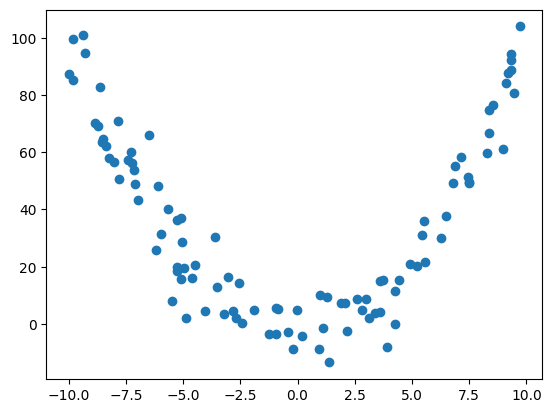

In [32]:
# generate synthetic data following x^2

np.random.seed(13)# reproducible results

def generate_data_x2(size_of_dataset:int, range_of_inputs:list=[-3, 5], scale_of_noise:float=3) -> tuple([np.array, np.array]):
    """ Generate synthetic data following x^2"""
    x = np.random.rand(size_of_dataset) * (range_of_inputs[1] - range_of_inputs[0]) + range_of_inputs[0] # generate random x values
    y = x**2 + np.random.randn(size_of_dataset) * scale_of_noise # noise spreads out the data and makes it look realistic
    return x, y

x, y = generate_data_x2(100, [-10, 10], 10)

plt.scatter(x, y)
plt.show()

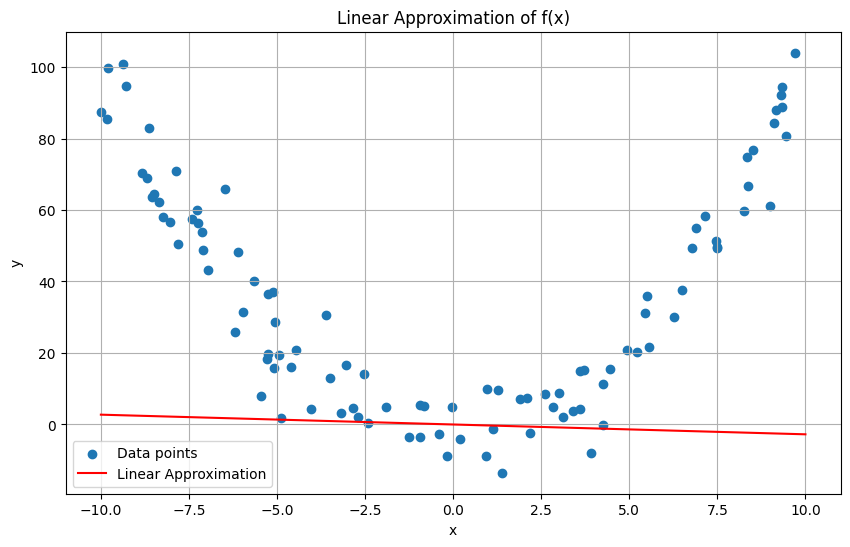

Error (lower): -0.002118903585668928
Error (upper): 0.03246075506807929
Error estimate is less than or equal to 0.015170925741205182 probably...


In [35]:
# Pick a point to approximate that is not in your dataset -- look at the values in x

## I'd like to approximate the function at x = 0
'''
num = 0
if num in x:
    print('Invalid: Number is in dataset')
else:
    print('Valid')
'''

# Find the two closes values in x to the point you want to approximate

## Looking at the dataset, the two closest values to x = 0 are 0.185244 and -0.46007287
#print(x)

# Estimate the derivative at that point using the two closest points

x1 = 0.185244
x2 = -0.46007287

def f(x):
    return x**2

deriv = (f(x2) - f(x1)) / (x2 - x1)

# Construct an approximation of the function at that point using the derivative

def linear_apprx(x):
    return deriv * x

x_values = np.linspace(-10, 10, 1000) # -1 < x < 1
y_values = linear_apprx(x_values)

# Plot the approximation
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data points')
plt.plot(x_values, y_values, label='Linear Approximation', color='red')
plt.title('Linear Approximation of f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Estimate the error--if you can.

## The error is the difference between the actual value of the function at x = 0 and the linear approximation at x = 0

## error <= f**(n+1) (z) * (x - a)**(n+1) / ((n+1)*(n)*(n-1)
## To find `z`, we need to find the maximum value of the second derivative of the function in the interval [x1, x2]
## The second derivative of f(x) is 2 and is constant, so the maximum value of the second derivative is 2
## Therefore, z = 2

## error <= 2 * (x - a)**3 / 6 = (x - a)**3 / 3
error1 = (0 - x1) ** 3 / 3
error2 = (0 - x2) ** 3 / 3

print(f'Error (lower): {error1}')
print(f'Error (upper): {error2}') 

## So maybe the error is about: 
print(f'Error estimate is less than or equal to {(error1 + error2) / 2} probably...') 

## So the error is less than 0.1 for both x1 and x2 which is pretty good
## Note, I should've probably done either x1 or x2 and not both, 
## but I wanted to show that the error is small for both, but not sure which one to use